# ML Zoomcamp Section 2 Homework

## Dataset
For this homework, we'll use the Car Fuel Efficiency dataset. Download it from https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv.

You can do it with wget also:

```wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv```

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

## Preparing the dataset
Use only the following columns:

'engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp

%matplotlib inline

In [2]:
df = pd.read_csv("car_fuel_efficiency.csv")

In [3]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [4]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [5]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']

In [6]:
df[base].head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [7]:
df = df[base]
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


## EDA

Look at the ```fuel_efficiency_mpg``` variable. Does it have a long tail?

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

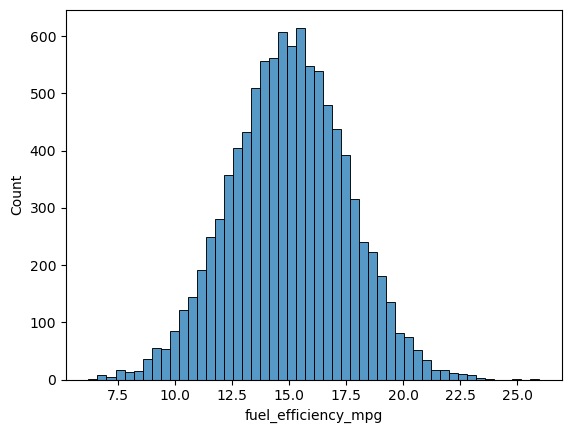

In [8]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)

**ANSWER:**  No. The distribution is normal, without long tails.

## Question 1

There's one column with missing values. What is it?

'engine_displacement'
'horsepower'
'vehicle_weight'
'model_year'

In [9]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

**ANSWER:**  The column 'horsepower' has missing values.

## Question 2

What's the median (50% percentile) for variable 'horsepower'?  (options are 49, 99, 149, or 199)

In [10]:
df.horsepower.median()

149.0

**ANSWER:**  The median value for horsepower is 149.

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures


In [11]:
# figure out length of dataset and figure out how to divide it up equally 
int(len(df) * 0.2)  # get integer value

1940

In [12]:
n = len(df)

n_val = int(len(df) * 0.2)
n_test = int(len(df) * 0.2)
n_train = int(len(df) * 0.6)

In [13]:
n, n_val + n_test + n_train

(9704, 9702)

These values are not the same, due to rounding; need to correct this before proceeding.

In [14]:
n_train = n - n_val - n_test

In [15]:
n_val, n_test, n_train

(1940, 1940, 5824)

Can select records by index using df.iloc.  But before we do this, need to shuffle and randomize the data points.

In [16]:
idx = np.arange(n)

In [17]:
# To make reproducible (give same results as in the course), set random seed
np.random.seed(42)
np.random.shuffle(idx)

In [18]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [19]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [20]:
len(df_train), len(df_test), len(df_val)

(5824, 1940, 1940)

In [21]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [22]:
y_train, y_val, y_test

(array([16.64294342, 16.29837715, 18.59182197, ..., 17.59323665,
        18.92574819, 17.96528447], shape=(5824,)),
 array([15.36634109, 14.60118181, 12.24703219, ..., 13.61312692,
        13.73334321, 15.81604972], shape=(1940,)),
 array([15.80435416, 14.27237387, 11.74844072, ..., 18.40443466,
        20.50246014, 16.81624056], shape=(1940,)))

In [23]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [24]:
len(y_train)

5824

In [25]:
y_train

array([16.64294342, 16.29837715, 18.59182197, ..., 17.59323665,
       18.92574819, 17.96528447], shape=(5824,))

In [26]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year
483,220,144.0,2535.887591,2009
7506,160,141.0,2741.170484,2019
8795,230,155.0,2471.880237,2017
1688,150,206.0,3748.164469,2015
6217,300,111.0,2135.716359,2006


## Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE? (0, mean, or both are equally good)

In [27]:
def prepare_X(df, fillna_value):
    df_num = df.fillna(fillna_value)
    X = df_num.values
    return X

In [28]:
# fill missing values with 0

X_train = prepare_X(df_train, 0)

In [29]:
# Function from lesson (non-regularized linear regression)

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    # np.set_printoptions(threshold = 100000000, suppress=True, precision=3)

    return w_full[0], w_full[1:]

In [30]:
# Train with zeros for NaN values

w0, w = train_linear_regression(X_train, y_train)

In [31]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

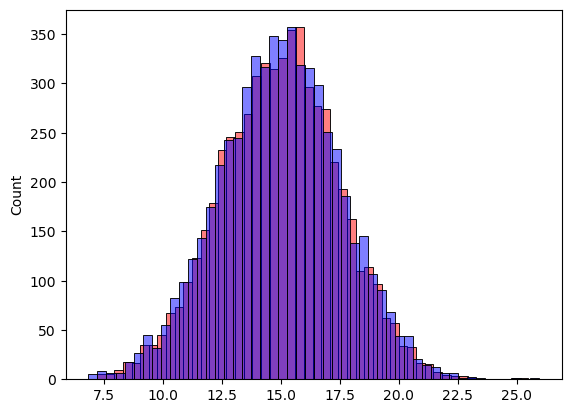

In [32]:
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_train, color = 'blue', alpha = 0.5, bins = 50)

In [33]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [34]:
score = rmse(y_train, y_pred)
round(score, 2)

np.float64(0.52)

Assessing using validation holdout dataset

In [35]:
X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
round(score, 2)

np.float64(0.52)

*The RMSE for this analysis, rounded to 2 decimal places, is 0.52.*

**Running the same analysis, substituting mean of horsepower, rather than 0, for NaN values:**

In [36]:
X_train = prepare_X(df_train, fillna_value=df_train['horsepower'].mean())

In [37]:
w0, w = train_linear_regression(X_train, y_train)

In [38]:
y_pred = w0 + X_train.dot(w)

In [39]:
y_pred

array([17.25910991, 16.19011261, 17.6924588 , ..., 17.51666431,
       18.77812427, 17.84593445], shape=(5824,))

<Axes: ylabel='Count'>

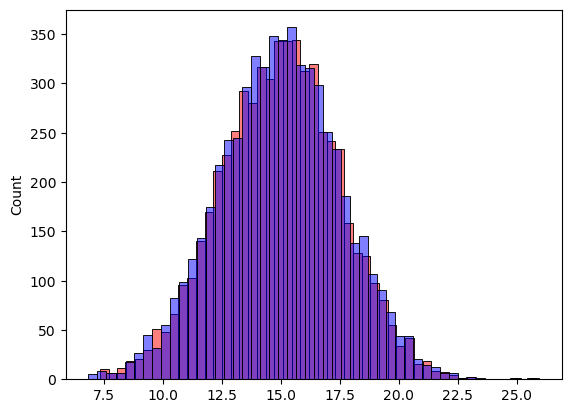

In [40]:
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_train, color = 'blue', alpha = 0.5, bins = 50)

In [41]:
score = rmse(y_train, y_pred)
round(score, 2)

np.float64(0.46)

Assessing using validation holdout dataset

In [42]:
X_val = prepare_X(df_val, fillna_value=df_train['horsepower'].mean())
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
round(score, 2)

np.float64(0.46)

*The RMSE for this analysis, rounded to 2 decimal places, is 0.46.*

We get a slightly better result by replacing NaN values with the mean of the horsepower for all cars in the dataset, rather than 0.

## Question 4
* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE? (If multiple options give the same best RMSE, select the smallest r.)

Options:
* 0
* 0.01
* 1
* 10
* 100

In [43]:
# From module 2 lesson:

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    # np.set_printoptions(threshold = 100000000, suppress=True, precision=3)

    return w_full[0], w_full[1:]

In [44]:
r = [0, 0.01, 0.1, 1, 5, 10, 100]

In [45]:
X_train = prepare_X(df_train, 0)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
round(score, 2)

np.float64(0.52)

In [46]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(f"For r = {r}, RMSE = {round(score, 5)}")

For r = 0, RMSE = 0.51738
For r = 0.01, RMSE = 0.51711
For r = 0.1, RMSE = 0.51875
For r = 1, RMSE = 0.52223
For r = 5, RMSE = 0.52289
For r = 10, RMSE = 0.52298
For r = 100, RMSE = 0.52306


*The regularization factor r = 0 gives the best result.*

### Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

What's the value of std?
* 0.001
* 0.006
* 0.060
* 0.600

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [52]:
rmse_list = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
    
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    X_train = prepare_X(df_train, fillna_value=0)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val, fillna_value=0)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    print(f"For seed = {seed}, RMSE = {round(score, 5)}")

    rmse_list.append(score)
    

For seed = 0, RMSE = 0.52065
For seed = 1, RMSE = 0.52134
For seed = 2, RMSE = 0.52281
For seed = 3, RMSE = 0.51595
For seed = 4, RMSE = 0.51091
For seed = 5, RMSE = 0.52834
For seed = 6, RMSE = 0.53139
For seed = 7, RMSE = 0.50907
For seed = 8, RMSE = 0.51474
For seed = 9, RMSE = 0.51319


In [53]:
np.std(rmse_list)

np.float64(0.006989446425505434)

The standard deviation of the scores is ~0.007.

### Question 6
* Split the dataset like previously; use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?

Options:
* 0.15
* 0.515
* 5.15
* 51.5

In [58]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

df_train_val = pd.concat([df_train, df_val])
df_train_val = df_train_val.reset_index(drop=True)

X_train_val = prepare_X(df_train_val, fillna_value=0)
y_train_val = np.concatenate([y_train, y_val])
w_0, w = train_linear_regression_reg(X_train_val, y_train_val, r=0.001)

X_test = prepare_X(df_test, fillna_value=0)
y_pred = w_0 + X_test.dot(w)

result = rmse(y_test, y_pred)
print(result)


0.5156261299166541


The RMSE for this regression is ~0.516.

### Submit the results

Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw02

If your answer doesn't match options exactly, select the closest one